<a href="https://colab.research.google.com/github/mhodierne1402/data-science-ml-portfolio/blob/main/iris-classification/Iris_Classification_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Simple Neural Network to Classify Irises**

7th March 2024.

---

#### ***Status:***

Neural network is functioning and generating reasonable performance on the training data. Need to experiment with hyperparameters to optimize and understand the sensitivity of the model.




---

### **About this project**

The goal of this project ...



---

### **Implementation approach**

This ....

---

# **1. Setup**

- Load the Python libraries required for the project
- Load the IRIS dataset from scikit-learn as a Pandas Dataframe
- Create NumPy matrices of the features data and labels data
- Create training and validation datasets


In [510]:
# Import all Python libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [511]:
# Load iris dataset
iris = datasets.load_iris()

# Create dataframe of iris data
iris_df = pd.DataFrame(iris.data)
iris_df['class'] = iris.target
iris_df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # remove any empty lines

# View the iris dataframe
print(iris_df.head())
print(iris_df.info())

# Create a features matrix X with dimensions (150, 4)
X = iris_df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']].values

# Create a labels matrix Y with dimensions (150, 3)
y = pd.get_dummies(iris_df['class']).to_numpy()

# Create train and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)



# Modify datasets to single sample for testing
#X_train = X_train[0].reshape(1, -1)
#y_train = y_train[0].reshape(1, -1)

# Modify datasets to first 4 samples for testing
#X_train = X_train[:5, :]
#y_train = y_train[:5, :]



   sepal_len  sepal_wid  petal_len  petal_wid  class
0        5.1        3.5        1.4        0.2      0
1        4.9        3.0        1.4        0.2      0
2        4.7        3.2        1.3        0.2      0
3        4.6        3.1        1.5        0.2      0
4        5.0        3.6        1.4        0.2      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


---

# **2. Initializing weights and biases**


- Hidden Layer (ReLU Activation): Use He initialization. This helps prevent vanishing or exploding gradients, which can occur with ReLU activations. Biases are initialized to 0 values.

- Output Layer (Softmax Activation): Use Xavier initialization. This is well-suited for sigmoid-like activations such as softmax. Biases are initialized to 0 values.

In [512]:
# Number of units in each layer
input_units = X.shape[1]
hidden_units = 10
output_units = y.shape[1]

# Initialize weights for the input to hidden layer (using He initialization)
w1 = np.random.randn(input_units, hidden_units) * np.sqrt(2 / input_units)

# Initialize weights for the input to hidden layer to zeros (used for testing)
#w1 = np.zeros((input_units, hidden_units))

# Initialize biases for the hidden layer
b1 = np.zeros(hidden_units)

# Initialize weights for the hidden to output layer (using Xavier initialization)
w2 = np.random.randn(hidden_units, output_units) * np.sqrt(1 / hidden_units)

# Initialize weights for the hidden to output layer (used for testing)
#w2 = np.zeros((hidden_units, output_units))

# Initialize biases for the output layer
b2 = np.zeros(output_units)


---

# **3. Functions**

In [513]:
def feedforward(X):
    # Calculate the values of units in all layers using weights and biases

    global w1, b1, w2, b2
    z1 = np.dot(X, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = softmax(z2)
    return a1, a2


def back_propagation(X, y_true, a1, a2, learning_rate):
    # Back propagation algorithm to compute the gradients and update weights and biases

    global w1, b1, w2, b2

    # Previous code attempt - how is this different from below?
    #da2 = -np.divide(y_true, a2)
    #dz2 = da2 * (a2 * (1 - a2))

    # Compute gradients
    dz2 = a2 - y_true
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    da1 = np.dot(dz2, w2.T)
    dz1 = da1 * relu_derivative(a1)
    dw1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Update weights and biases
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    return


def relu(x):
    return np.maximum(x, 0)


def relu_derivative(x):
    return np.where(x > 0, 1, 0)
    # Alternative:
    #np.array(x > 0, dtype = np.float32)


def softmax(x):
    # Subtract the max value of x to ensure numerical stability
    x -= np.max(x, axis=1, keepdims=True)
    exp_scores = np.exp(x)
    softmax_scores = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return softmax_scores


def cat_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    sample_losses = -np.sum(y_true * np.log(y_pred), axis=1)
    avg_loss = np.sum(sample_losses) / len(y_true)
    return avg_loss


def label_encoding(vector):
    max_index = np.argmax(vector)
    encoded_vector = np.zeros(vector.shape, dtype=int)
    encoded_vector[max_index] = 1
    return encoded_vector


def generate_batches(X, y, batch_size):
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)  # Shuffle indices to randomize the data
    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]


---

# **4. Training the model**

In [514]:
# Train the model

# Set model hyperparameters
num_epochs = 20
epochs = range(1, num_epochs + 1)
batch_size = 120

# Define the initial learning rate and decay factor
initial_learning_rate = 0.001
decay_factor = 0.5
epochs_per_decay = 5  # Decrease the learning rate every 10 epochs

epoch_train_loss, epoch_train_acc = [], []
epoch_val_loss, epoch_val_acc = [], []

for epoch in epochs:
    batch_train_loss, batch_train_acc = [], []

    # Compute the current learning rate based on the decay schedule
    current_learning_rate = initial_learning_rate * (decay_factor ** (epoch // epochs_per_decay))

    for X_batch, y_batch in generate_batches(X_train, y_train, batch_size):

       # Forward pass
        a1, a2 = feedforward(X_batch)

        # Compute training loss
        train_loss = cat_cross_entropy(y_batch, a2)
        batch_train_loss.append(train_loss)

        # Compute training accuracy
        a2_encoded = np.array([label_encoding(row) for row in a2])
        train_acc = np.mean(np.array_equal(a2_encoded, y_batch)) * 100.0
        batch_train_acc.append(train_acc)

        # Backward pass and update weights and biases
        back_propagation(X_batch, y_batch, a1, a2, current_learning_rate)

    # Average training loss and accuracy for the epoch
    train_loss = np.mean(batch_train_loss)
    train_acc = np.mean(batch_train_acc)
    print(train_loss)
    print(train_acc)

    # Append to lists for tracking
    epoch_train_loss.append(train_loss)
    epoch_train_acc.append(train_acc)

    # Check overfitting with validation dataset
    a1, a2 = feedforward(X_val)

    # Compute validation loss
    val_loss = cat_cross_entropy(y_val, a2)
    epoch_val_loss.append(val_loss)

    # Compute validation accuracy
    a2_encoded = np.array([label_encoding(row) for row in a2])
    val_acc = np.mean(np.array_equal(a2_encoded, y_val)) * 100.0
    epoch_val_acc.append(val_acc)

    print(f'Epoch {epoch}: Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

    if epoch % num_epochs == 0:
        break


Epoch 1: Training Loss: 2.120276685167174, Training Accuracy: 0.0, Validation Loss: 3.7072282400002203, Validation Accuracy: 0.0
Epoch 2: Training Loss: 4.8588408666509695, Training Accuracy: 0.0, Validation Loss: 9.03353885286201, Validation Accuracy: 0.0
Epoch 3: Training Loss: 6.313340613403294, Training Accuracy: 0.0, Validation Loss: 5.876294649781981, Validation Accuracy: 0.0
Epoch 4: Training Loss: 5.4648891070121985, Training Accuracy: 0.0, Validation Loss: 1.307262429746314, Validation Accuracy: 0.0
Epoch 5: Training Loss: 1.1807918483010755, Training Accuracy: 0.0, Validation Loss: 1.193729612162443, Validation Accuracy: 0.0
Epoch 6: Training Loss: 1.0972783319923907, Training Accuracy: 0.0, Validation Loss: 1.132364752380169, Validation Accuracy: 0.0
Epoch 7: Training Loss: 1.050106025539889, Training Accuracy: 0.0, Validation Loss: 1.0958225867782556, Validation Accuracy: 0.0
Epoch 8: Training Loss: 1.020031806326359, Training Accuracy: 0.0, Validation Loss: 1.0738324419666

---

# **4. Generalization performance**

- Review the performance of the model by comparing loss and accuracy metrics for the training dataset and the validation dataset; identify optimum number of epochs for training


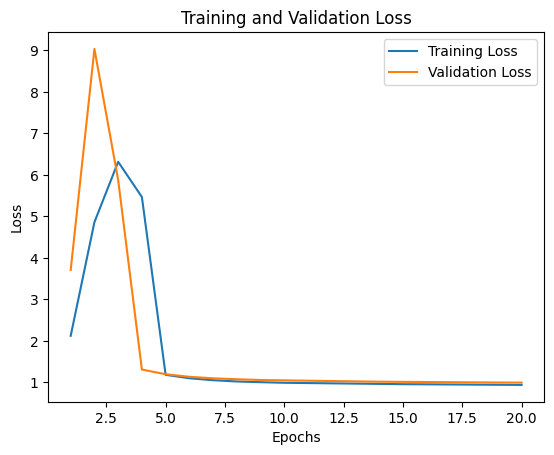

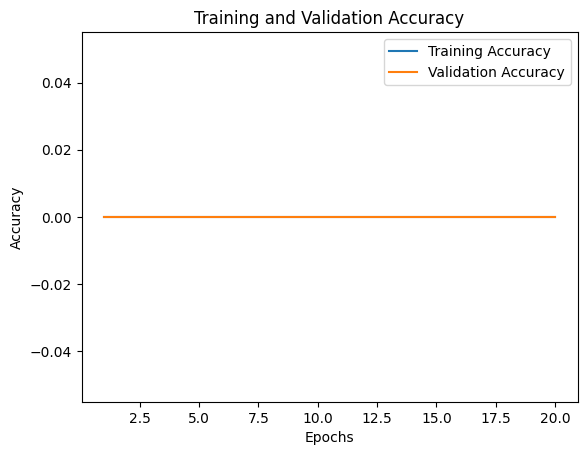

In [515]:
# Plot loss over epochs
epochs = np.array(epochs)

plt.plot(epochs, epoch_train_loss, label='Training Loss')
plt.plot(epochs, epoch_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy over epochs
plt.plot(epochs, epoch_train_acc, label='Training Accuracy')
plt.plot(epochs, epoch_val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Try implementing Kfold:

```
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target variable
kf = KFold(n_splits=5, shuffle=True)  # Define the number of splits (k) and whether to shuffle the data

accuracies = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]  # Split features into train and validation sets
    y_train, y_val = y[train_index], y[val_index]  # Split target variable into train and validation sets
    
    # Train your model on X_train and y_train
    
    # Evaluate your model on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Calculate the average accuracy over all folds
average_accuracy = sum(accuracies) / len(accuracies)
```

In [516]:
import numpy as np
import matplotlib.pyplot as plt

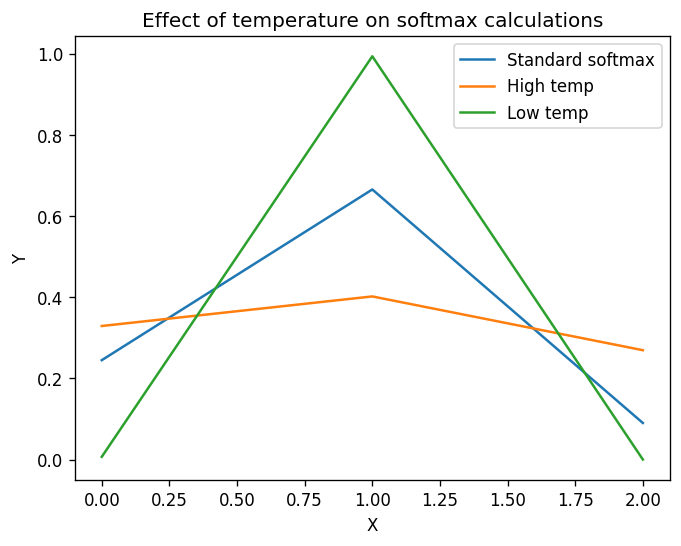

In [517]:
def softmax(x, tau):
    # Subtract the max value of x to ensure numerical stability ???!!!!
    x -= np.max(x, axis=1, keepdims=True)
    exp_scores = np.exp(x / tau)
    softmax_scores = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return softmax_scores


ZZ = np.array([[19, 20, 18]]).reshape(1, -1)

# Standard softmax
A_std = softmax(ZZ, 1)[0]

# High Temperature softmax
A_high = softmax(ZZ, 5)[0]

# Low temperature softmax
A_low = softmax(ZZ, 0.2)[0]

# Plot the results
plt.figure(dpi=120)
plt.plot(A_std, label='Standard softmax')
plt.plot(A_high, label='High temp')
plt.plot(A_low, label='Low temp')
plt.title('Effect of temperature on softmax calculations')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()





References

Building makemore Part 4: Becoming a Backprop Ninja
https://www.youtube.com/watch?v=q8SA3rM6ckI&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=6&t=939s


Matrix multiplication animation
https://www.youtube.com/watch?v=1hf_cHNbgCk


The Matrix Calculus You Need For Deep Learning
https://explained.ai/matrix-calculus/#sec:1.2



Softmax derivative
https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/
https://www.mldawn.com/the-derivative-of-softmaxz-function-w-r-t-z/

```
# utility function we will use later when comparing manual gradients to PyTorch gradients
def cmp(s, dt, t):
  ex = torch.all(dt == t.grad).item()
  app = torch.allclose(dt, t.grad)
  maxdiff = (dt - t.grad).abs().max().item()
  print(f'{s:15s} | exact: {str(ex):5s} | approximate: {str(app):5s} | maxdiff: {maxdiff}')
```